In [2]:
library(CellChat)
library(tidyverse)
library(Seurat)

In [3]:
setwd('/import/DB/fel/BJTC-204')

In [4]:
sce = readRDS('/import/DB/fel/final.rds')

In [14]:
model.gene = c('HIST1H4C','PRSS3','TUSC3')

In [15]:
DefaultAssay(sce) = 'RNA'

In [24]:
Idents(sce) = 'Condition'

Warning message:
"Scaling data with a low number of groups may produce misleading results"


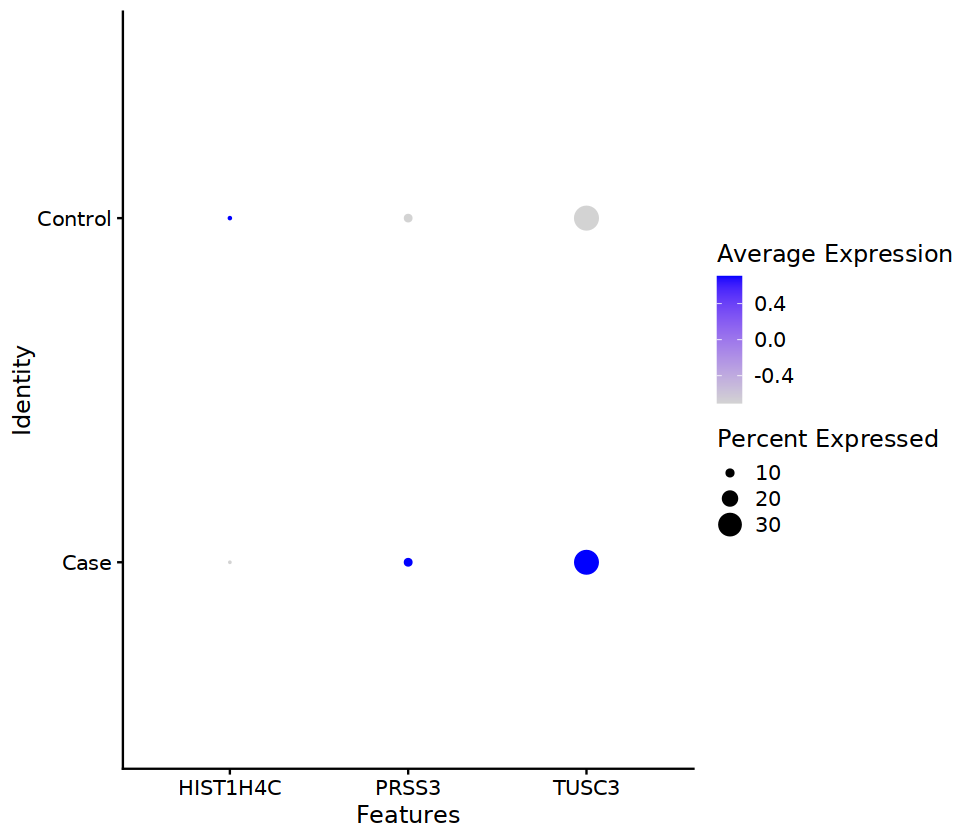

In [25]:
DotPlot(sce,features = model.gene)

In [18]:
options(repr.plot.width = 8)

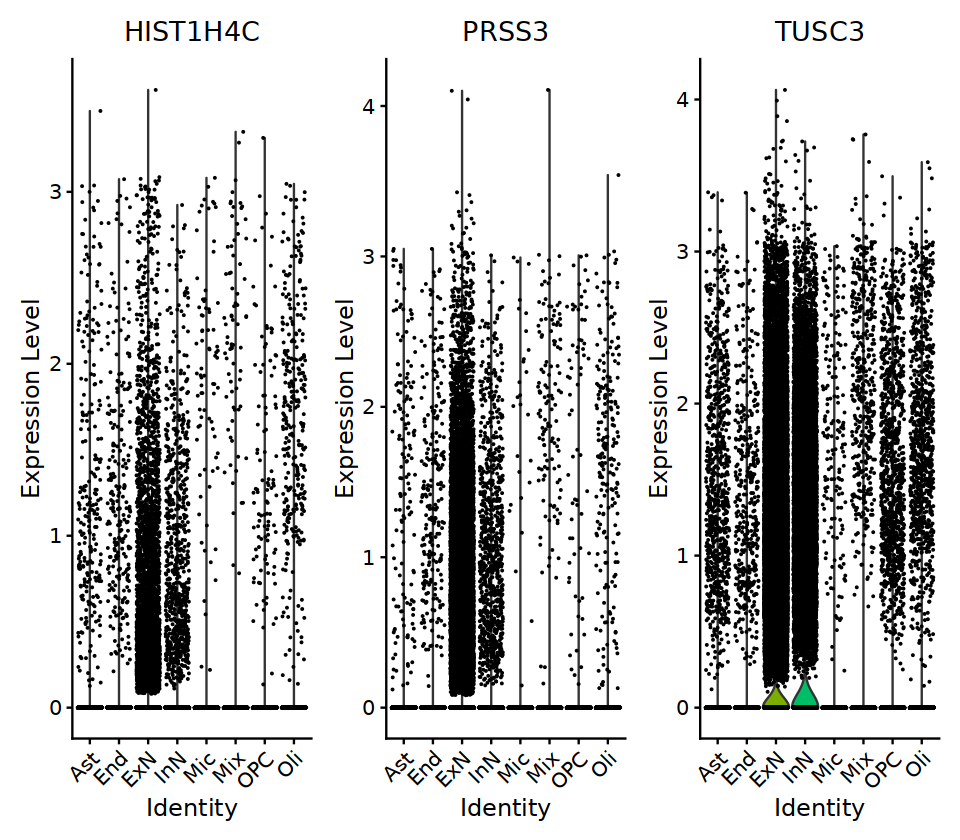

In [19]:
VlnPlot(sce,features = model.gene,raster=FALSE)

In [11]:
feature = list(model.gene)

In [12]:
sce <- AddModuleScore(sce,
                          features = feature,
                          ctrl = 100,
                          name = 'model_related')

Warning message:
"The following features are not present in the object: H4C3, not searching for symbol synonyms"


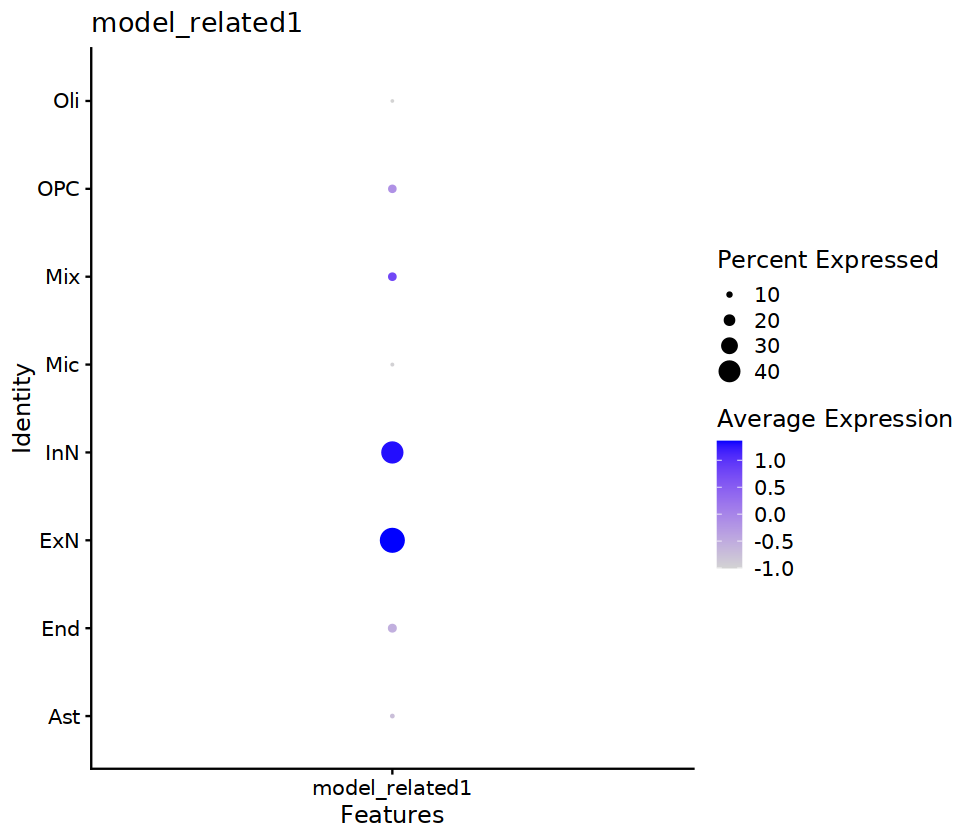

In [13]:
DotPlot(sce,features = 'model_related1')+ggtitle('model_related1')

In [17]:
crg = read.table('./00_rawdata/crg.txt',header =T,sep = '\t')

In [18]:
library(homologene)

In [19]:
genelist = crg$Symbol
homo = homologene(genelist, inTax = 10090, outTax = 9606)

In [23]:
crg.gene = homo[,2]

In [32]:
feature = list(crg.gene)

In [34]:
sce <- AddModuleScore(sce,
                          features = feature,
                          ctrl = 100,
                          name = 'CRG_related')

Warning message:
"The following features are not present in the object: CSF2, FBXL21, PMCH, SOX14, UTS2R, not searching for symbol synonyms"


In [35]:
Idents(sce) = 'celltype'

In [37]:
colnames(sce@meta.data)

[1] "orig.ident"               "nCount_RNA"              
 [3] "nFeature_RNA"             "sample"                  
 [5] "barcodeid"                "celltype"                
 [7] "celltype2"                "nFeaturess_RNA"          
 [9] "nFeaturess_RNA_by_counts" "total_counts"            
[11] "total_counts_mt"          "pct_counts_mt"           
[13] "leiden"                   "seurat_clusters"         
[15] "percent.mt"               "group"                   
[17] "Condition"                "CRG_related1"

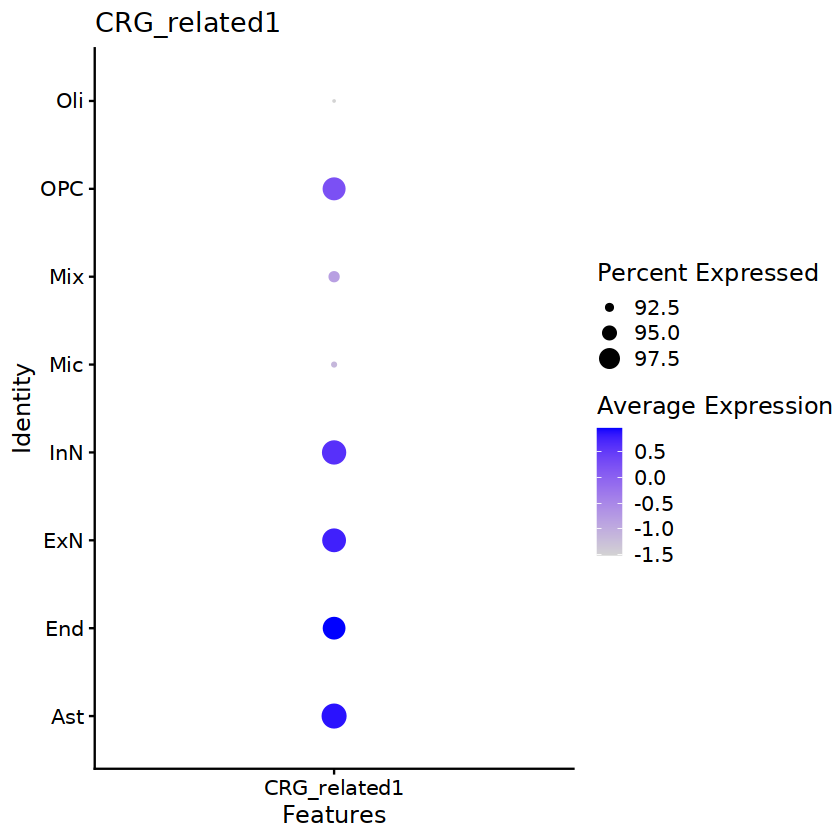

In [54]:
DotPlot(sce,features = 'CRG_related1')+ggtitle('CRG_related1')

In [ ]:
#  1. 看模型基因的表达情况
# 2. 看前面wgcna中模块基因的表达情况